# Self-driving car Nanodegree - Term 1

## Project 3: **Advanced Lane Lines** 
***
In this project, We attempted to identify the lane boundaries in a video.

Author : [Vu Tran](https://github.com/tranlyvu)

- [Github repo](https://github.com/tranlyvu/autonomous-vehicle-projects/tree/master/Advanced%20Lane%20Lines)
- [Notebook](https://github.com/tranlyvu/autonomous-vehicle-projects/blob/master/Advanced%20Lane%20Lines/notebook/advanced_lane_lines.ipynb)
- [Python code](https://github.com/tranlyvu/autonomous-vehicle-projects/blob/master/Advanced%20Lane%20Lines/src/advanced_lane_lines.py)

---
### Importing packages

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import numpy as np
import glob
import os
%matplotlib inline

'''Directory'''
CAMERA_IMAGE_DIRECTORY = '../camera_cal/'
OUTPUT_DIRRECTORY = '../output_images/'
TEST_IMAGES_DIRECTORY = '../test_images/'
EXAMPLES = '../examples'

'''Read images directories'''
chessboard_images = glob.glob(CAMERA_IMAGE_DIRECTORY + 'calibration*.jpg')
test_images = glob.glob(TEST_IMAGES_DIRECTORY + '*.jpg')

### Testing with 1 test image
---
#### Finding chessboard corners

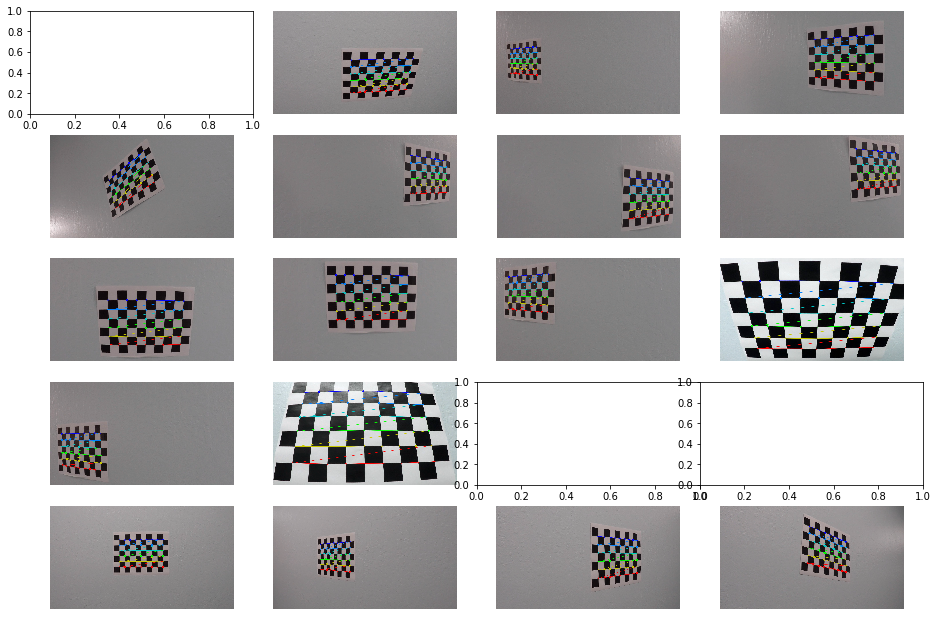

In [2]:
#Prepare obj poinrts
objp = np.zeros((9 * 6, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
obj_points = [] #3d points in real world space
img_points = [] #2d points in image points

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

fig, axs = plt.subplots(5,4, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i, fname in enumerate(chessboard_images):
    img = cv2.imread(fname)
    image_name=os.path.split(fname)[1]
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    if ret == True:
        obj_points.append(objp)
        
        # this step to refine image points was taken from:
        # http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        img_points.append(corners2)
        
        cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        corners_write_name = OUTPUT_DIRRECTORY + 'chessboard_corners/' +  'corners_found_'+ str(9) + '_' + str(6) + '_' + image_name
        cv2.imwrite(corners_write_name, img)
        
        # Draw chessboard with corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        axs[i].axis('off')
        axs[i].imshow(img)


Some images were not displayed because no corners were found

#### Calculating image calibrarion

In [3]:
# Calcualte the undistortion matrix to calculate matrix and distance coefficient
img = cv2.imread(chessboard_images[0])
img_size = (img.shape[1], img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_size, None, None)

#### Apply a distortion correction to test images.

In [4]:
def undistort_image(img):           
    result = cv2.undistort(img, mtx, dist, None, mtx)
    return result

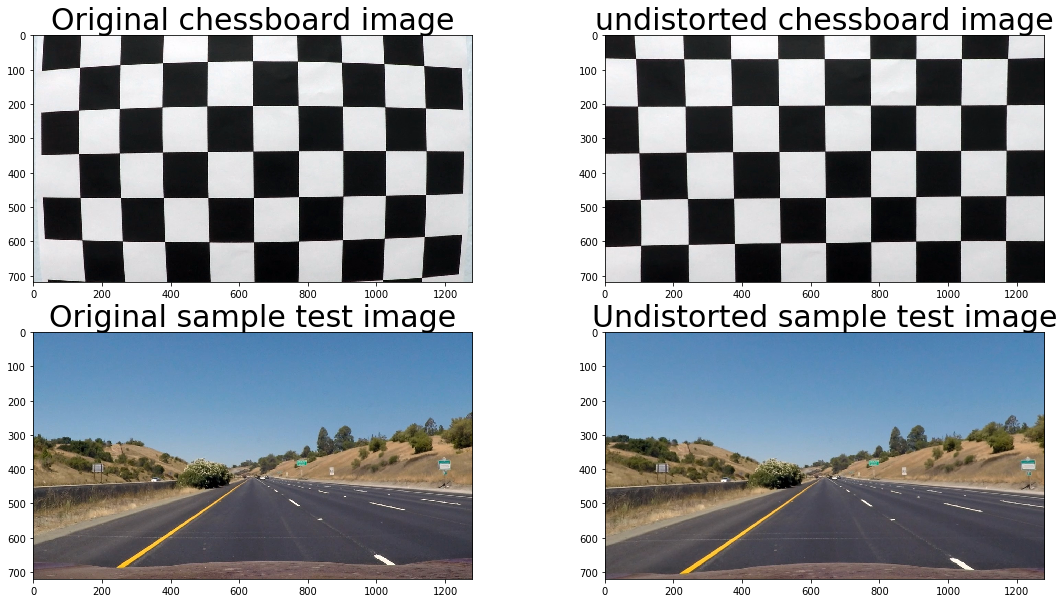

In [5]:
## using 1 chessboard image from calibration directory
chessboard_img = cv2.imread(chessboard_images[0])
undistort_chessboard_img = undistort_image(chessboard_img)

# using 1 image from test image directory to build and demonstrate each step of the pipeline
bgr_test_img = cv2.imread(test_images[0])
rgb_test_img = cv2.cvtColor(bgr_test_img, cv2.COLOR_BGR2RGB)
undistort_test_img = undistort_image(rgb_test_img )

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)

ax1[0].imshow(chessboard_img)
ax1[0].set_title('Original chessboard image', fontsize=30)
ax1[1].imshow(undistort_chessboard_img)
ax1[1].set_title('undistorted chessboard image', fontsize=30)

ax2[0].imshow(rgb_test_img)
ax2[0].set_title('Original sample test image', fontsize=30)
ax2[1].imshow(undistort_test_img)
ax2[1].set_title('Undistorted sample test image', fontsize=30)

---
#### Visualize colorspace 

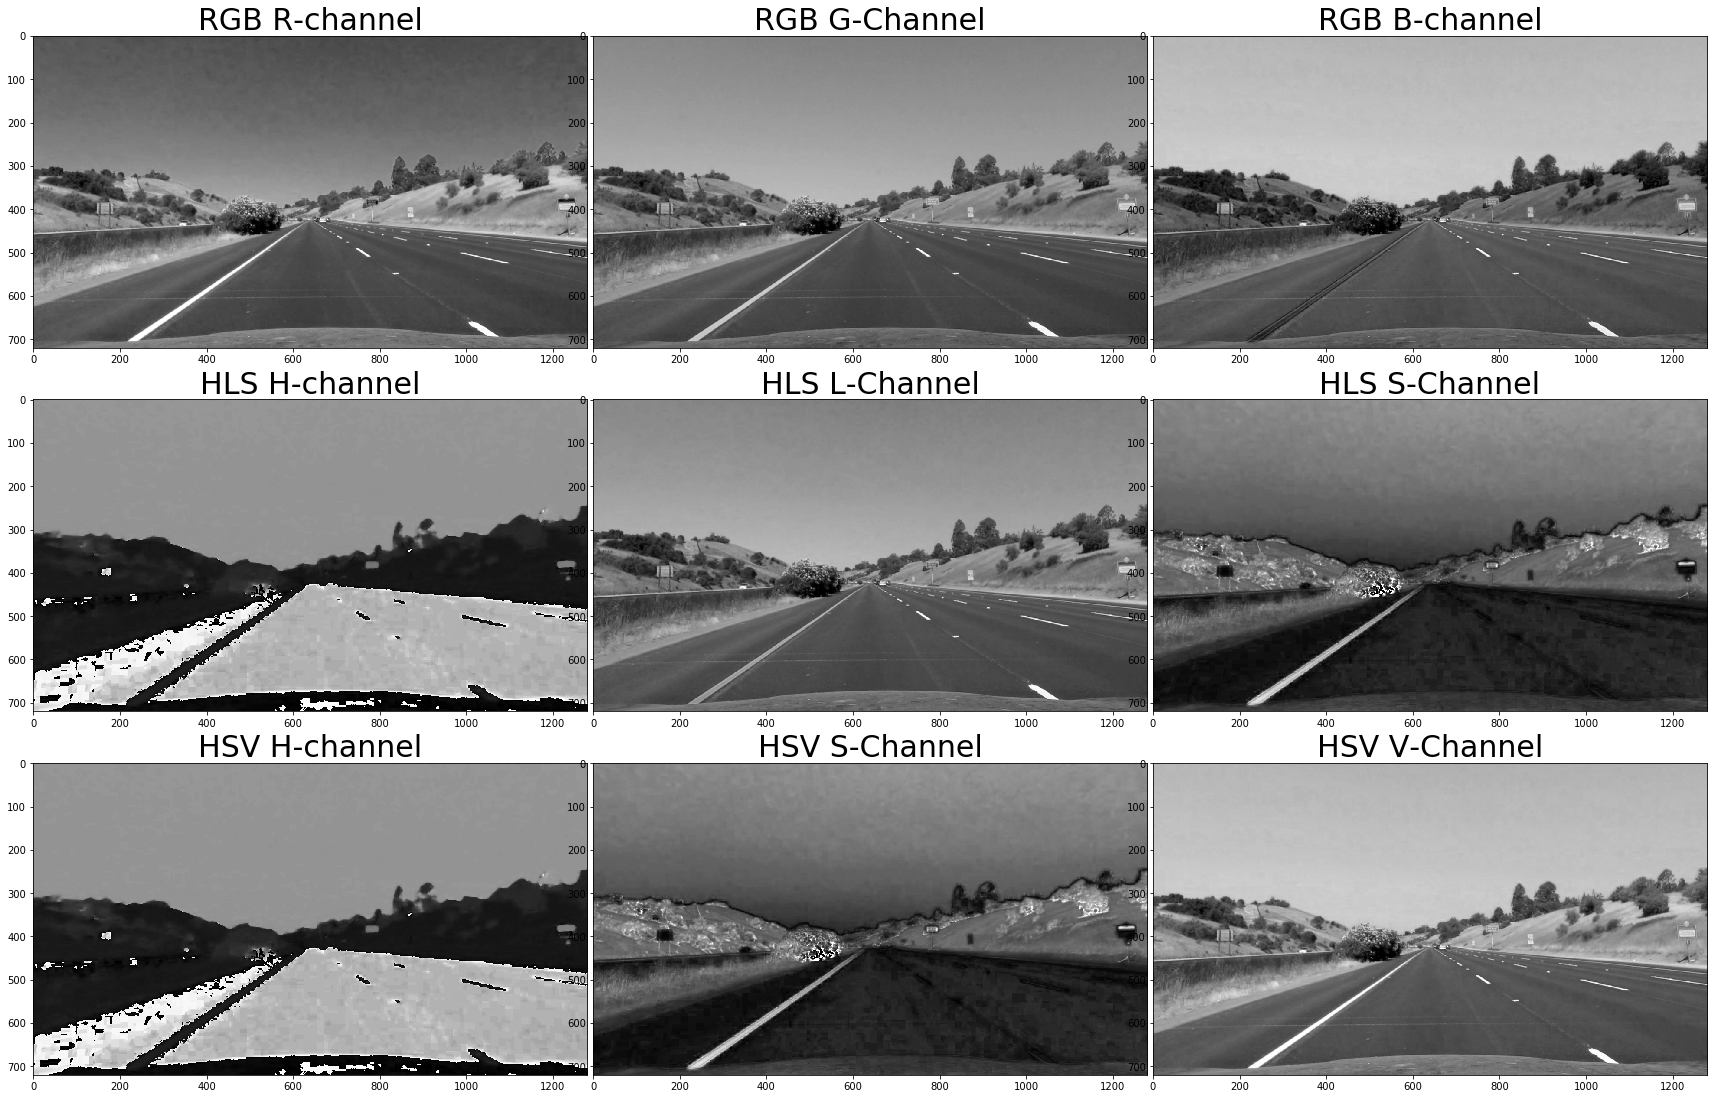

In [6]:
# Visualize multiple color space channels
example_img_unwarp_R = undistort_test_img[:,:,0]
example_img_unwarp_G = undistort_test_img[:,:,1]
example_img_unwarp_B = undistort_test_img[:,:,2]

example_img_unwarp_HLS = cv2.cvtColor(undistort_test_img, cv2.COLOR_RGB2HLS)
example_img_unwarp_H = example_img_unwarp_HLS[:,:,0]
example_img_unwarp_L = example_img_unwarp_HLS[:,:,1]
example_img_unwarp_S = example_img_unwarp_HLS[:,:,2]

example_img_unwarp_HSV = cv2.cvtColor(undistort_test_img, cv2.COLOR_RGB2HSV)
example_img_unwarp_H = example_img_unwarp_HSV[:,:,0]
example_img_unwarp_S = example_img_unwarp_HSV[:,:,1]
example_img_unwarp_V = example_img_unwarp_HSV[:,:,2]

fig, axs = plt.subplots(3,3, figsize=(30, 20))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()

axs[0].imshow(example_img_unwarp_R, cmap='gray')
axs[0].set_title('RGB R-channel', fontsize=30)
axs[1].imshow(example_img_unwarp_G, cmap='gray')
axs[1].set_title('RGB G-Channel', fontsize=30)
axs[2].imshow(example_img_unwarp_B, cmap='gray')
axs[2].set_title('RGB B-channel', fontsize=30)

axs[3].imshow(example_img_unwarp_H, cmap='gray')
axs[3].set_title('HLS H-channel', fontsize=30)
axs[4].imshow(example_img_unwarp_L, cmap='gray')
axs[4].set_title('HLS L-Channel', fontsize=30)
axs[5].imshow(example_img_unwarp_S, cmap='gray')
axs[5].set_title('HLS S-Channel', fontsize=30)

axs[6].imshow(example_img_unwarp_H, cmap='gray')
axs[6].set_title('HSV H-channel', fontsize=30)
axs[7].imshow(example_img_unwarp_S, cmap='gray')
axs[7].set_title('HSV S-Channel', fontsize=30)
axs[8].imshow(example_img_unwarp_V, cmap='gray')
axs[8].set_title('HSV V-Channel', fontsize=30)

RGB R-channel , HLS S-channel and HSV V-channel seem to work best in picking up the lane lines, Let's try to find the threshold
#### Finding binary images 

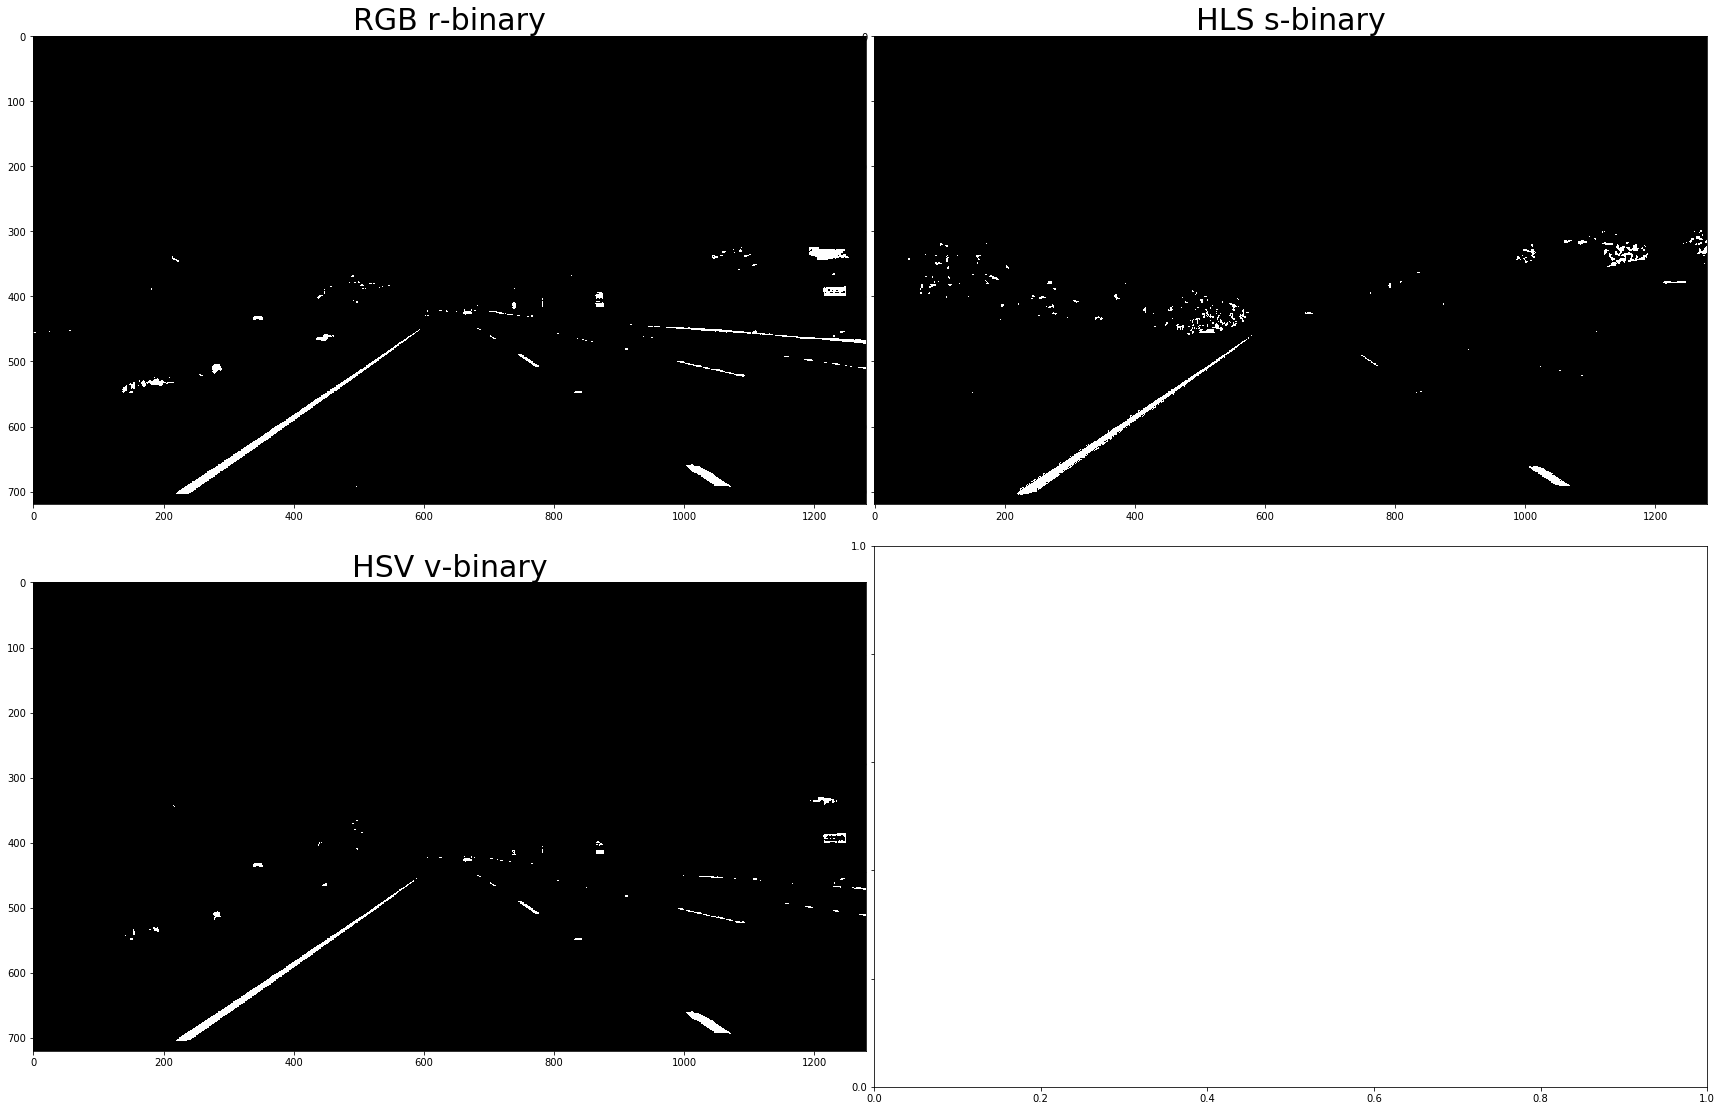

In [95]:
rgb_r_channel = undistort_test_img[:,:,0]
rgb_r_thresh  = (200, 255)
rgb_r_binary = np.zeros_like(rgb_r_channel)
rgb_r_binary[(rgb_r_channel > rgb_r_thresh[0]) & (rgb_r_channel <= rgb_r_thresh[1])] = 1

hls = cv2.cvtColor(undistort_test_img, cv2.COLOR_RGB2HLS)
hls_s_channel = hls[:,:,2]
hls_s_thresh = (150, 255)
hls_s_binary = np.zeros_like(hls_s_channel)
hls_s_binary[(hls_s_channel > hls_s_thresh[0]) & (hls_s_channel <= hls_s_thresh[1])] = 1

hsv = cv2.cvtColor(undistort_test_img, cv2.COLOR_RGB2HSV)
hsv_v_channel = hsv[:,:,2]
hsv_v_thresh = (210, 255)
hsv_v_binary = np.zeros_like(hsv_v_channel)
hsv_v_binary[(hsv_v_channel > hsv_v_thresh[0]) & (hsv_v_channel <= hsv_v_thresh[1])] = 1
plt.imsave(EXAMPLES + '/color_filter_binary.jpg', rgb_r_binary)

fig, axs = plt.subplots(2,2, figsize=(30, 20))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()

axs[0].imshow(rgb_r_binary, cmap='gray')
axs[0].set_title('RGB r-binary', fontsize=30)
axs[1].imshow(hls_s_binary, cmap='gray')
axs[1].set_title('HLS s-binary', fontsize=30)
axs[2].imshow(hsv_v_binary, cmap='gray')
axs[2].set_title('HSV v-binary', fontsize=30)

---
#### Sobel operator

In [15]:
def absolute_sobel_threshold(img, orient='x', thresh_min = 0, thresh_max = 255):
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(img, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(img, cv2.CV_64F, 0, 1))
        
    scaled_sobel = np.uint8(255 * abs_sobel/np.max(abs_sobel))
    sobel_binary = np.zeros_like(scaled_sobel)
    sobel_binary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sobel_binary

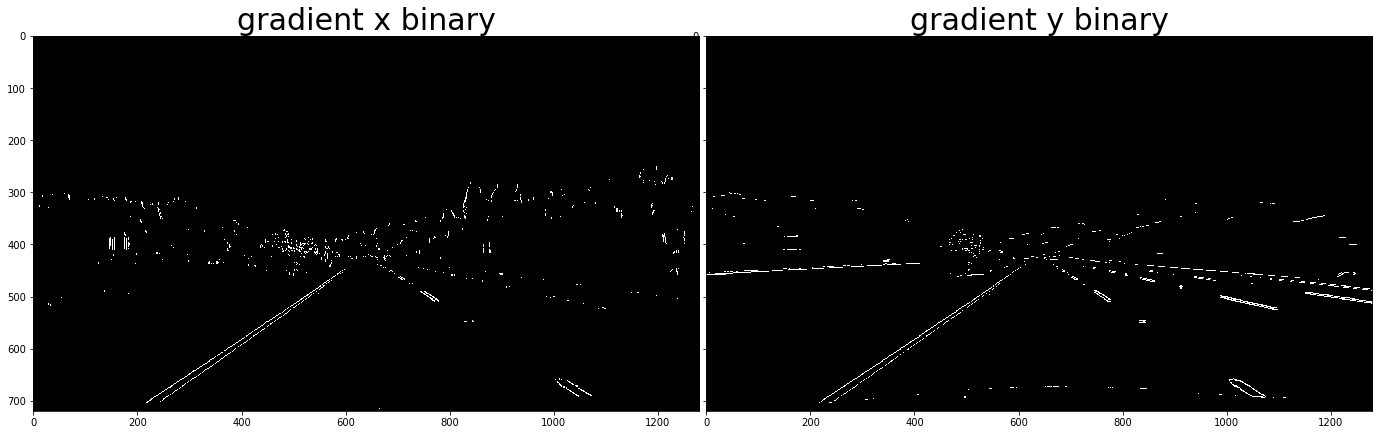

In [9]:
gray_img =  cv2.cvtColor(undistort_test_img, cv2.COLOR_RGB2GRAY)
grad_x_binary = absolute_sobel_threshold(gray_img , orient='x', thresh_min=60, thresh_max=150)
grad_y_binary = absolute_sobel_threshold(gray_img , orient='y', thresh_min=90, thresh_max=255)

#Plot the result
fig, axs = plt.subplots(1,2, figsize=(24, 9))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()
axs[0].imshow(grad_x_binary, cmap='gray')
axs[0].set_title('gradient x binary', fontsize=30)
axs[1].imshow(grad_y_binary, cmap='gray')
axs[1].set_title('gradient y binary', fontsize=30)

---
#### Magnitude of the gradient

In [10]:
def magnitude_threshold(gray_img, sobel_kernel = 3, mag_thresh = (0, 255)): 
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    grad_mag = np.sqrt(sobelx**2 + sobely**2)
    scale_factor = np.max(grad_mag)/255 
    grad_mag = (grad_mag/scale_factor).astype(np.uint8) 
    mag_binary = np.zeros_like(grad_mag)
    mag_binary[(grad_mag >= mag_thresh[0]) & (grad_mag <= mag_thresh[1])] = 1
    return mag_binary

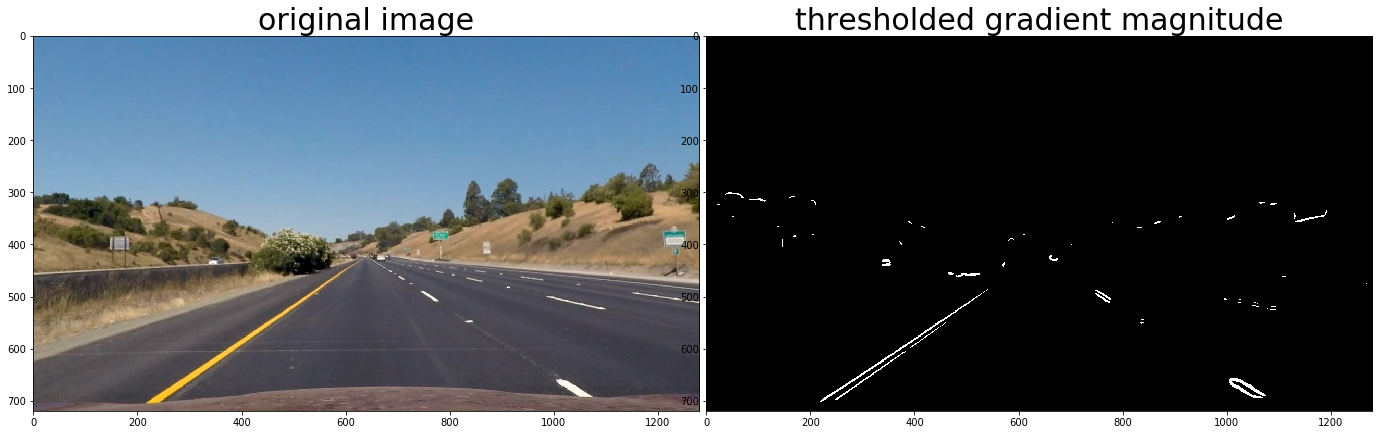

In [11]:
gray_img =  cv2.cvtColor(undistort_test_img, cv2.COLOR_RGB2GRAY)
mag_binary = magnitude_threshold(gray_img, sobel_kernel = 31, mag_thresh = (135, 255))
#Plot the result
fig, axs = plt.subplots(1,2, figsize=(24, 9))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()
axs[0].imshow(undistort_test_img, cmap='gray')
axs[0].set_title('original image', fontsize=30)
axs[1].imshow(mag_binary , cmap='gray')
axs[1].set_title('thresholded gradient magnitude', fontsize=30)

----
#### Direction of the gradient

In [16]:
def direction_threshold(gray_img, sobel_kernel = 3, dir_thresh = (0, np.pi/2)):
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    abs_grad_dir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    dir_binary =  np.zeros_like(abs_grad_dir)
    dir_binary[(abs_grad_dir >= dir_thresh[0]) & (abs_grad_dir <= dir_thresh[1])] = 1
    return dir_binary 

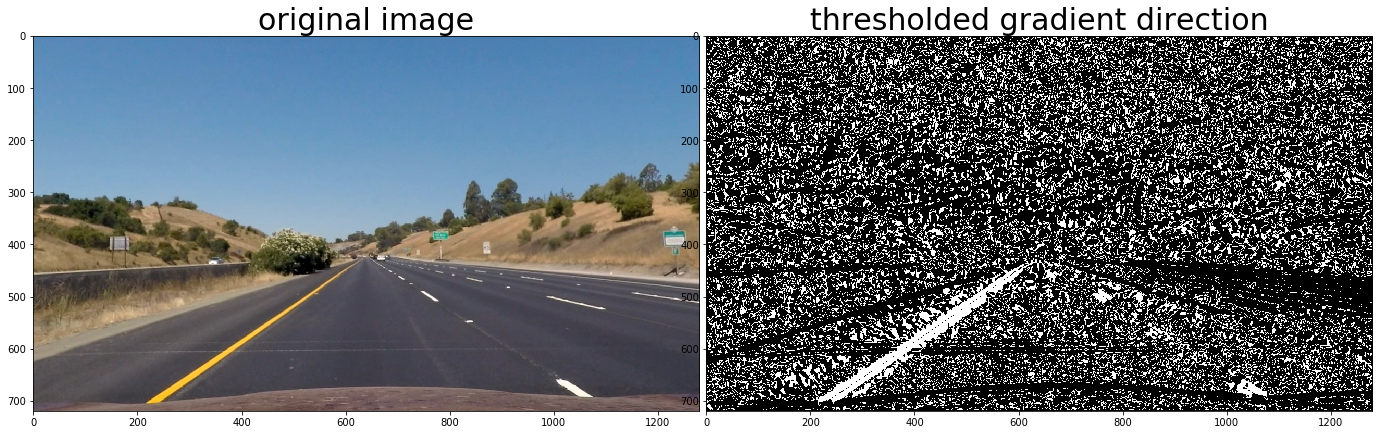

In [17]:
gray_img =  cv2.cvtColor(undistort_test_img, cv2.COLOR_RGB2GRAY)

dir_binary = direction_threshold(gray_img, sobel_kernel = 23, dir_thresh = (0.7, 1.1))

#Plot the result
fig, axs = plt.subplots(1,2, figsize=(24, 9))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()

axs[0].imshow(undistort_test_img, cmap='gray')
axs[0].set_title('original image', fontsize = 30)

axs[1].imshow(dir_binary  , cmap='gray')
axs[1].set_title('thresholded gradient direction', fontsize = 30)

---
#### Combining thresholds

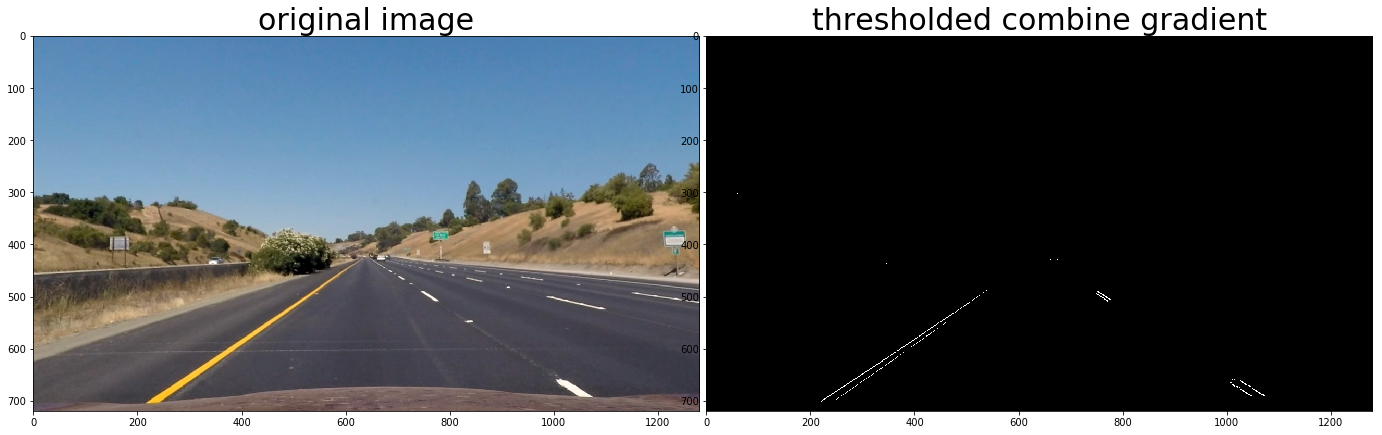

In [18]:
gray_img =  cv2.cvtColor(undistort_test_img, cv2.COLOR_RGB2GRAY)

grad_x_binary = absolute_sobel_threshold(gray_img, orient='x', thresh_min=60, thresh_max=150)
grad_y_binary = absolute_sobel_threshold(gray_img, orient='y', thresh_min=90, thresh_max=255)

mag_binary = magnitude_threshold(gray_img, sobel_kernel = 31, mag_thresh = (135, 255))
#dir_binary = direction_threshold(gray_img, sobel_kernel = 23, dir_thresh = (0.7, 1.1))

combined = np.zeros_like(gray_img)
combined[(grad_x_binary == 1) & (grad_y_binary == 1) & (mag_binary == 1) ] = 1

#Plot the result
fig, axs = plt.subplots(1,2, figsize=(24, 9))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()

axs[0].imshow(undistort_test_img, cmap='gray')
axs[0].set_title('original image', fontsize=30)

axs[1].imshow(combined, cmap='gray')
axs[1].set_title('thresholded combine gradient', fontsize=30)

#### Combining thresholded gradient and color

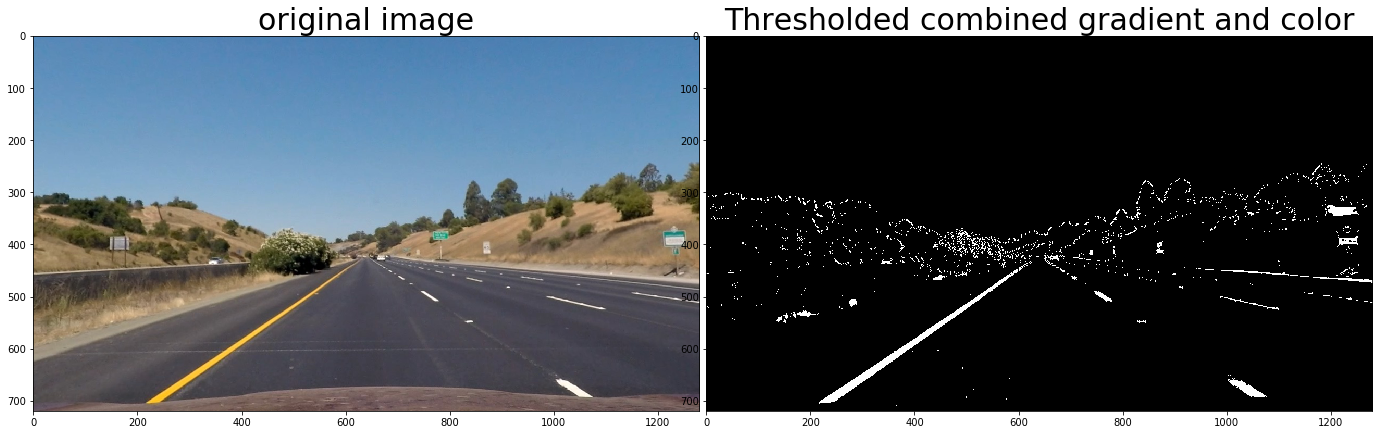

In [20]:
gray_img =  cv2.cvtColor(undistort_test_img, cv2.COLOR_RGB2GRAY)

grad_x_binary = absolute_sobel_threshold(gray_img, orient='x', thresh_min=30, thresh_max=250)
grad_y_binary = absolute_sobel_threshold(gray_img, orient='y', thresh_min=20, thresh_max=100)
mag_binary = magnitude_threshold(gray_img, sobel_kernel = 9, mag_thresh = (120, 255))
dir_binary = direction_threshold(gray_img, sobel_kernel = 15, dir_thresh = (0.7, 1.1))

combined_threshold = np.zeros_like(dir_binary)
combined_threshold[((grad_x_binary == 1) & (grad_y_binary == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1


hsv = cv2.cvtColor(undistort_test_img, cv2.COLOR_RGB2HSV)
hsv_v_channel = hsv[:,:,2]
hsv_v_thresh = (210, 255)
hsv_v_binary = np.zeros_like(hsv_v_channel)
hsv_v_binary[(hsv_v_channel > hsv_v_thresh[0]) & (hsv_v_channel <= hsv_v_thresh[1])] = 1

#rgb_r_channel = undistort_test_img[:,:,0]
#rgb_r_thresh  = (200, 255)
#rgb_r_binary = np.zeros_like(rgb_r_channel)
#rgb_r_binary[(rgb_r_channel > rgb_r_thresh[0]) & (rgb_r_channel <= rgb_r_thresh[1])] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack((combined_threshold, combined_threshold, hsv_v_binary)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(hsv_v_channel)
combined_binary[(rgb_r_binary == 1) | (combined_threshold == 1)] = 1
plt.imsave(EXAMPLES + '/combine_binary.jpg', combined_binary)

#Plot the result
fig, axs = plt.subplots(1,2, figsize=(24, 9))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()

axs[0].imshow(undistort_test_img, cmap='gray')
axs[0].set_title('original image', fontsize = 30)

axs[1].imshow(combined_binary, cmap='gray')
axs[1].set_title('Thresholded combined gradient and color', fontsize = 30)

---
##### Apply a perspective transform to rectify binary image ("birds-eye view").

In [53]:
def warper(image, source, destination):
    h,w = img.shape[:2]
    transform_matrix = cv2.getPerspectiveTransform(source, destination)
    inverse_matrix = cv2.getPerspectiveTransform(destination, source)
    warped = cv2.warpPerspective(image, transform_matrix , (w,h))
    return warped, transform_matrix, inverse_matrix

def source(img_size):
    src = np.float32(
        [
             [(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
             [(img_size[0] / 2 + 55), img_size[1] / 2 + 100],
             [((img_size[0] / 6) - 10), img_size[1]],
             [(img_size[0] * 5 / 6) + 60, img_size[1]]
            
        ])
    
    return src

def destination(img_size):
    dest = np.float32(
        [
             [(img_size[0] / 4), 0],
             [(img_size[0] * 3 / 4), 0],
             [(img_size[0] / 4), img_size[1]],
             [(img_size[0] * 3 / 4), img_size[1]]
        ])
    
    return dest

(1280, 720)


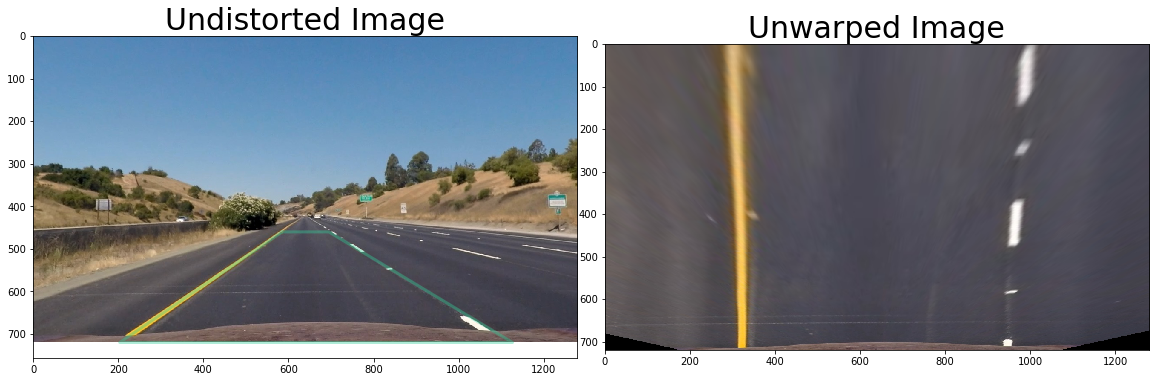

In [59]:
img_size = (undistort_test_img.shape[1], undistort_test_img.shape[0])
print(img_size)
src = source(img_size)
dest = destination(img_size)
warp_example_img, M, inverse_M = warper(undistort_test_img, src, dest) 
plt.imsave(EXAMPLES + '/warp_example_img.jpg', warp_example_img)

# Visualize unwarp
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)

ax1.imshow(undistort_test_img)
x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]
ax1.plot(x, y, color='#33cc99', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
ax1.set_title('Undistorted Image', fontsize=30)

ax2.imshow(warp_example_img)
ax2.set_title('Unwarped Image', fontsize=30)

#### Pipeline

In [93]:
def pipeline(img):
    
    warp_img, M, inverse_M = warper(img, src, dest) 

    gray_img =  cv2.cvtColor(warp_img, cv2.COLOR_RGB2GRAY)
    grad_x_binary = absolute_sobel_threshold(gray_img, orient='x', thresh_min=30, thresh_max=250)
    grad_y_binary = absolute_sobel_threshold(gray_img, orient='y', thresh_min=20, thresh_max=100)
    mag_binary = magnitude_threshold(gray_img, sobel_kernel = 9, mag_thresh = (120, 255))
    dir_binary = direction_threshold(gray_img, sobel_kernel = 15, dir_thresh = (0.7, 1.1))

    combined_threshold = np.zeros_like(dir_binary)
    combined_threshold[((grad_x_binary == 1) & (grad_y_binary == 1)) & (mag_binary == 1) ] = 1

    #rgb_r_channel = warp_img[:,:,0]
    #rgb_r_thresh  = (200, 255)
    #rgb_r_binary = np.zeros_like(rgb_r_channel)
    #rgb_r_binary[(rgb_r_channel > rgb_r_thresh[0]) & (rgb_r_channel <= rgb_r_thresh[1])] = 1
    
    
    hsv = cv2.cvtColor(warp_img, cv2.COLOR_RGB2HSV)
    hsv_v_channel = hsv[:,:,2]
    hsv_v_thresh = (210, 255)
    hsv_v_binary = np.zeros_like(hsv_v_channel)
    hsv_v_binary[(hsv_v_channel > hsv_v_thresh[0]) & (hsv_v_channel <= hsv_v_thresh[1])] = 1

    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack((combined_threshold, combined_threshold, hsv_v_binary)) * 255

    # Combine the two binary thresholds
    combined_binary = np.zeros_like(gray_img)
    combined_binary[(hsv_v_binary == 1) | (combined_threshold == 1)] = 1
    
    return combined_binary,  inverse_M

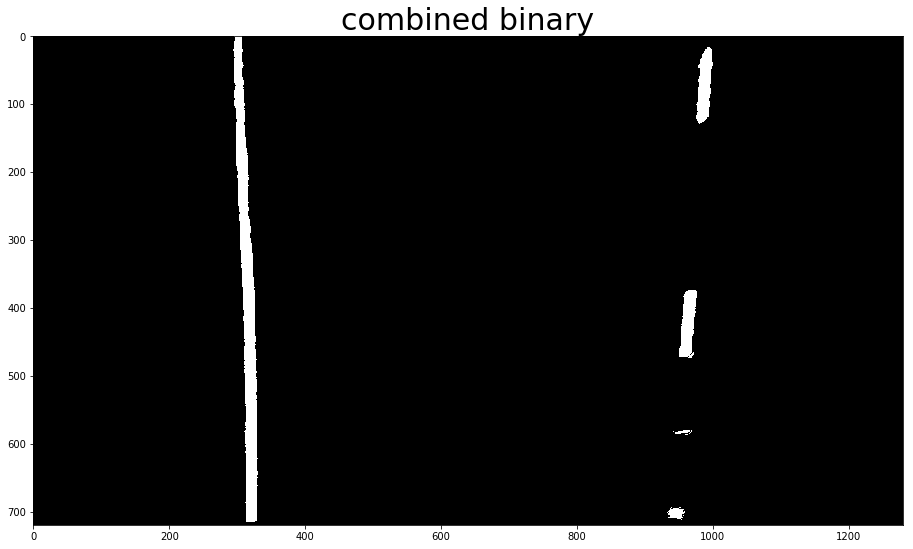

In [158]:
bgr_test_img_2 = cv2.imread(test_images[0])
rgb_test_img_2 = cv2.cvtColor(bgr_test_img_2, cv2.COLOR_BGR2RGB)
undistort_test_img = undistort_image(rgb_test_img)
binary_warped, inverse_M = pipeline(undistort_test_img)

fig, axs = plt.subplots(1,1, figsize=(24, 9))

axs.imshow(binary_warped, cmap='gray')
axs.set_title('combined binary', fontsize = 30)

#### Finding lane lines

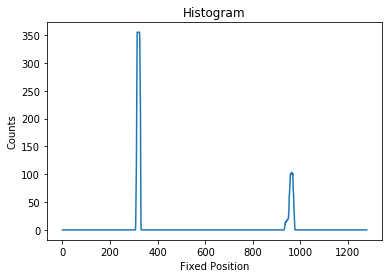

In [159]:
out_img = np.dstack((binary_warped, binary_warped, binary_warped)) * 255

# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)

plt.title('Histogram')
plt.xlabel("Fixed Position")
plt.ylabel("Counts")
plt.plot(histogram)
plt.savefig(EXAMPLES + '/histogram.jpg')

In [160]:
## fiding  left and right point
midpoint = np.int(histogram.shape[0]/2)
quarter_point = np.int(midpoint//2)
leftx_base = np.argmax(histogram[quarter_point:midpoint]) + quarter_point
rightx_base = np.argmax(histogram[midpoint:(midpoint+quarter_point)]) + midpoint

print(binary_warped.shape)
# Choose the number of sliding windows
nwindows = 10
# Set height of windows
window_height = np.int(binary_warped.shape[0]/ nwindows)

# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []


# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window + 1) * window_height
    win_y_high = binary_warped.shape[0] - window * window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 

    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 

rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

(720, 1280)


(720, 0)

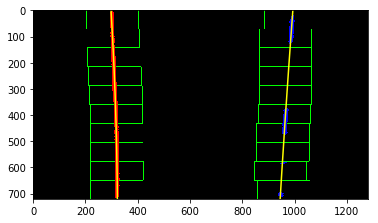

In [161]:
# VIsualization

# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

#Plot the result
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

#### Skip the sliding windows step once we know where the lines are


In [162]:
def fit_without_sliding(binary_warped, left_fit, right_fit):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit_update = np.polyfit(lefty, leftx, 2)
    right_fit_update = np.polyfit(righty, rightx, 2)
    
    return left_fit, right_fit 

(720, 0)

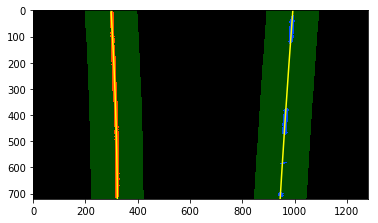

In [163]:
left_fit, right_fit = fit_without_sliding(binary_warped, left_fit, right_fit)

# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

#### Measuring curvature

In [180]:
# fit = [A,B,C] , radisu in pixel space
def calculate_curvature_pixel_space(fit, ploty):
    y_value = np.max(ploty)
    nominator =  (1 + (2 * fit[0] * y_value + fit[1])**2)**1.5
    denominator = np.absolute(2 * fit[0])
    return (nominator / denominator)

def calculate_curvature_world_space(fit,  ploty):
    # Define conversions in x and y from pixels space to meters
    y_in_m_per_pix = 30/720 # meters per pixel in y dimension
    x_in_m_per_pix = 3.7/700 # meters per pixel in x dimension
    # Fit new polynomials to x,y in world space
    fit_x = fit[0]*ploty**2 + fit[1] * ploty + fit[2]
    
    fit_word_space = np.polyfit(ploty * y_in_m_per_pix, fit_x* x_in_m_per_pix, 2)
    result = calculate_curvature_pixel_space(fit_word_space,  ploty)
    return result

# choose the maximum y-value, corresponding to the bottom of the image
left_curvature_pixel_space = calculate_curvature_pixel_space(left_fit,  ploty)
right_curvature_pixel_space = calculate_curvature_pixel_space(right_fit,  ploty)

left_curvature_world_space = calculate_curvature_world_space(left_fit,  ploty)
right_curvature_world_space = calculate_curvature_world_space(right_fit,  ploty)

print("Pixel space: left curvature: " + str(left_curvature_pixel_space) + ' , right curvature: ' + str(right_curvature_pixel_space))
print("World space: left curvature: " + str(left_curvature_world_space) + ' m , right curvature: ' + str(right_curvature_world_space) + ' m')


Pixel space: left curvature: 13392.5440853 , right curvature: 49920.7740049
World space: left curvature: 4559.63632703 m , right curvature: 16337.8625965 m


#### Drawing

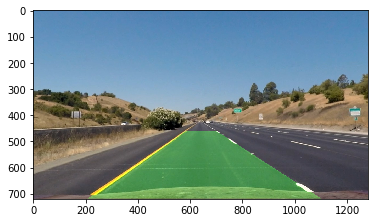

In [170]:
def drawing(undistorted_img, binary_warped, ploty, left_fitx, right_fitx, inverse_M, img_size): 
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, inverse_M, img_size) 
    # Combine the result with the original image
    result = cv2.addWeighted(undistorted_img, 1, newwarp, 0.3, 0)
    plt.imshow(result)
    return result


result = drawing(undistort_test_img, binary_warped, ploty, left_fitx, right_fitx, inverse_M, img_size)
pt.imsave(EXAMPLES + "/test_img_1_output.jpg")

#### Tracking

In [ ]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

### Running with every test images

In [ ]:
for fname in test_images:
    img = cv2.imread(fname)
    image_name = os.path.split(fname)[1]
    undistort = undistort_image(img) 
    
    undistort_write_name = OUTPUT_DIRRECTORY + 'undistort/' + 'undistort_' + image_name
    cv2.imwrite(undistort_write_name, undistort)
    
    
    gray_img =  cv2.cvtColor(undistort_example, cv2.COLOR_RGB2GRAY)
    grad_x_binary = absolute_sobel_threshold(gray_img, orient='x', thresh_min=30, thresh_max=250)
    grad_y_binary = absolute_sobel_threshold(gray_img, orient='y', thresh_min=20, thresh_max=100)
    mag_binary = magnitude_threshold(gray_img, sobel_kernel = 9, mag_thresh = (120, 255))
    dir_binary = direction_threshold(gray_img, sobel_kernel = 15, dir_thresh = (0.7, 1.1))

    combined_threshold = np.zeros_like(dir_binary)
    combined_threshold[((grad_x_binary == 1) & (grad_y_binary == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    
    rgb_r_channel = undistort_example[:,:,0]
    rgb_r_thresh  = (200, 255)
    rgb_r_binary = np.zeros_like(rgb_r_channel)
    rgb_r_binary[(rgb_r_channel > rgb_r_thresh[0]) & (rgb_r_channel <= rgb_r_thresh[1])] = 1

    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack((rgb_r_binary, combined_threshold, combined_threshold)) * 255

    # Combine the two binary thresholds
    combined_binary = np.zeros_like(combined_threshold)
    combined_binary[(rgb_r_binary == 1) | (combined_threshold == 1)] = 1
    plt.imsave(OUTPUT_DIRRECTORY + 'threshold/' + 'binary_' + image_name, combined_binary)


    